In [ ]:
#Importing necessary Libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn import metrics
from sklearn.metrics import precision_score, f1_score, recall_score, roc_curve, auc
import matplotlib.pyplot as plt
from keras.optimizers import Adam
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import numpy as np
from sklearn.metrics import classification_report, roc_auc_score
from tensorflow import keras

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My\ Drive

Mounted at /content/drive
/content/drive/My Drive


In [ ]:
#Loading Dataset
data = pd.read_csv("train_flooding_data.csv",header=None, names=['Label','Time','ID','Signal_1','Signal_2','Signal_3','Signal_4'])
data.head(5)

<ipython-input-3-39c5e456dd27>:2: DtypeWarning: Columns (0,1,3,4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("train_flooding_data.csv",header=None, names=['Label','Time','ID','Signal_1','Signal_2','Signal_3','Signal_4'])


,Label,Time,ID,Signal_1,Signal_2,Signal_3,Signal_4
0,Label,Time,ID,Signal1_of_ID,Signal2_of_ID,Signal3_of_ID,Signal4_of_ID
1,0,81008449.4467,id3,0.2,1.0,NaN,NaN
2,0,81008456.7515,id9,0.370002961208173,NaN,NaN,NaN
3,0,81008458.2074,id7,0.0441385209497538,0.0,NaN,NaN
4,0,81008459.2775,id8,0.170533835773697,NaN,NaN,NaN


Data Cleaning & Transformation

In [ ]:
data=data.drop(index=0)

In [ ]:
ID_dic={"id1":1,"id2":2,"id3":3,"id4":4,"id5":5,"id6":6,"id7":7,"id8":8,"id9":9,"id10":10}
data=data.replace({"ID":ID_dic})

In [ ]:
sig_1={None:0.0001}
data=data.replace({"Signal_1":sig_1})
sig_2={None:0.0001}
data=data.replace({"Signal_2":sig_2})
sig_3={None:0.0001}
data=data.replace({"Signal_3":sig_3})
sig_4={None:0.0001}
data=data.replace({"Signal_4":sig_4})

In [ ]:
data['Label'] = pd.to_numeric(data['Label'])
data['Time'] = pd.to_numeric(data['Time'])
data['Signal_1'] = pd.to_numeric(data['Signal_1'])
data['Signal_2'] = pd.to_numeric(data['Signal_2'])
data['Signal_3'] = pd.to_numeric(data['Signal_3'])
data['Signal_4'] = pd.to_numeric(data['Signal_4'])
data.head(5)

,Label,Time,ID,Signal_1,Signal_2,Signal_3,Signal_4
1,0,8.100845e+07,3,0.200000,1.000000,0.0001,0.0001
2,0,8.100846e+07,9,0.370003,0.000100,0.0001,0.0001
3,0,8.100846e+07,7,0.044139,0.000000,0.0001,0.0001
4,0,8.100846e+07,8,0.170534,0.000100,0.0001,0.0001
5,0,8.100846e+07,5,0.173044,0.874886,0.0001,0.0001


In [ ]:
X_train = data.iloc[:,1:].values

In [ ]:
Y_train = data.iloc[:,0].values

In [ ]:
#Loading Validatation& testing Dataset
data2 = pd.read_csv("test_flooding_data.csv",header=None, names=['Label','Time','ID','Signal_1','Signal_2','Signal_3','Signal_4'])
data2.head(5)

<ipython-input-10-2598c922afaf>:2: DtypeWarning: Columns (0,1,3,4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  data2 = pd.read_csv("test_flooding_data.csv",header=None, names=['Label','Time','ID','Signal_1','Signal_2','Signal_3','Signal_4'])


,Label,Time,ID,Signal_1,Signal_2,Signal_3,Signal_4
0,Label,Time,ID,Signal1_of_ID,Signal2_of_ID,Signal3_of_ID,Signal4_of_ID
1,0,84609015.5321,id7,0.0534030319165358,0.5,NaN,NaN
2,0,84609016.0812,id5,0.1305365512894374,0.9993689406052844,NaN,NaN
3,0,84609019.5537,id6,1.0,0.8888888888888888,NaN,NaN
4,0,84609020.493,id3,1.0,0.994631763073768,NaN,NaN


In [ ]:
data2=data2.drop(index=0)

In [ ]:
sig_1={None:0.0001}
data2=data2.replace({"Signal_1":sig_1})
sig_2={None:0.0001}
data2=data2.replace({"Signal_2":sig_2})
sig_3={None:0.0001}
data2=data2.replace({"Signal_3":sig_3})
sig_4={None:0.0001}
data2=data2.replace({"Signal_4":sig_4})

In [ ]:
data2=data2.replace({"ID":ID_dic})
data2['Label'] = pd.to_numeric(data2['Label'])
data2['Time'] = pd.to_numeric(data2['Time'])
data2['Signal_1'] = pd.to_numeric(data2['Signal_1'])
data2['Signal_2'] = pd.to_numeric(data2['Signal_2'])
data2['Signal_3'] = pd.to_numeric(data2['Signal_3'])
data2['Signal_4'] = pd.to_numeric(data2['Signal_4'])
data2.head(5)

,Label,Time,ID,Signal_1,Signal_2,Signal_3,Signal_4
1,0,8.460902e+07,7,0.053403,0.500000,0.0001,0.0001
2,0,8.460902e+07,5,0.130537,0.999369,0.0001,0.0001
3,0,8.460902e+07,6,1.000000,0.888889,0.0001,0.0001
4,0,8.460902e+07,3,1.000000,0.994632,0.0001,0.0001
5,0,8.460902e+07,8,0.187604,0.000100,0.0001,0.0001


In [ ]:
X_valid = data2.iloc[0:257581,1:].values
Y_valid = data2.iloc[0:257581,0].values
X_test = data2.iloc[257581:,1:].values
Y_test = data2.iloc[257581:,0].values

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Grid Search for hyperparameter tuning

In [ ]:
ann = tf.keras.models.Sequential()
from keras import regularizers

In [ ]:
def create_model( dropout=0.01,neurons1=64,neurons2=64):
  ann =Sequential()
  ann.add(Dense(units=6, input_shape=(6,) ))
  ann.add(tf.keras.layers.Dense(units=neurons1,activation='relu',kernel_initializer="he_uniform",kernel_regularizer=regularizers.l2(0.01)))
  ann.add(tf.keras.layers.Dropout(dropout))
  ann.add(tf.keras.layers.Dense(units=neurons2,activation='relu',kernel_initializer="he_uniform",kernel_regularizer=regularizers.l2(0.01)))
  ann.add(tf.keras.layers.Dropout(dropout))
  ann.add(Dense(units=1,activation="sigmoid", kernel_initializer="glorot_uniform"))
  ann.compile(optimizer='Adam',loss="binary_crossentropy",metrics=['accuracy'])
  return ann

In [ ]:
param_grid = {'dropout': [0.01, 0.1], 'neurons1' :[64,128,256], 'neurons2':[64,128,256]}

In [ ]:
ann=KerasClassifier(build_fn=create_model, epochs=10, batch_size=16, verbose=1)

<ipython-input-22-c48144ae6b09>:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  ann=KerasClassifier(build_fn=create_model, epochs=10, batch_size=16, verbose=1)


In [ ]:
grid_search = GridSearchCV(estimator=ann, param_grid=param_grid, cv=5)
grid_search.fit(X_valid, Y_valid)

16099/16099 [==============================] - 36s 2ms/step - loss: 88848.5234 - accuracy: 0.6520


GridSearchCV(cv=5,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7ff58890d000>,
             param_grid={'dropout': [0.01, 0.1], 'neurons1': [64, 128, 256],
                         'neurons2': [64, 128, 256]})

In [ ]:
print("Best hyperparameters:", grid_search.best_params_)
print("Best mean cross-validated score:", grid_search.best_score_)

Best hyperparameters: {'dropout': 0.01, 'neurons1': 64, 'neurons2': 64}
Best mean cross-validated score: 0.7184301018714905


Building ANN model using best hyperpameter & training

In [ ]:
ann.add(tf.keras.layers.Dense(units=6, input_shape=(6,) ))
ann.add(tf.keras.layers.Dense(units=64,activation='relu',kernel_initializer="he_uniform",kernel_regularizer=regularizers.l2(0.01)))
ann.add(tf.keras.layers.Dropout(0.01))
ann.add(tf.keras.layers.Dense(units=64,activation='relu',kernel_initializer="he_uniform",kernel_regularizer=regularizers.l2(0.01)))
ann.add(tf.keras.layers.Dropout(0.01))
ann.add(tf.keras.layers.Dense(units=1,activation="sigmoid", kernel_initializer="glorot_uniform",kernel_regularizer=regularizers.l2(0.01)))
ann.compile(optimizer='Adam',loss="binary_crossentropy",metrics=['accuracy'])

In [ ]:
ann.fit(X_train,Y_train, batch_size=128,epochs = 10,validation_data=(X_valid, Y_valid))

Epoch 1/10
16099/16099 [==============================] - 40s 2ms/step - loss: 0.6531 - accuracy: 0.6954 - val_loss: 14.3436 - val_accuracy: 0.7184
Epoch 2/10
16099/16099 [==============================] - 38s 2ms/step - loss: 0.6147 - accuracy: 0.6955 - val_loss: 0.5960 - val_accuracy: 0.7184
Epoch 3/10
16099/16099 [==============================] - 38s 2ms/step - loss: 0.6146 - accuracy: 0.6955 - val_loss: 0.5958 - val_accuracy: 0.7184
Epoch 4/10
16099/16099 [==============================] - 39s 2ms/step - loss: 0.6146 - accuracy: 0.6955 - val_loss: 0.5957 - val_accuracy: 0.7184
Epoch 5/10
16099/16099 [==============================] - 38s 2ms/step - loss: 0.6146 - accuracy: 0.6955 - val_loss: 0.5956 - val_accuracy: 0.7184
Epoch 6/10
16099/16099 [==============================] - 39s 2ms/step - loss: 0.6146 - accuracy: 0.6955 - val_loss: 0.5959 - val_accuracy: 0.7184
Epoch 7/10
16099/16099 [==============================] - 38s 2ms/step - loss: 0.6146 - accuracy: 0.6955 - val_loss: 

Testing with test data and evaluation using metrics


In [ ]:
y_pred = ann.predict(X_test)


8050/8050 [==============================] - 9s 1ms/step


In [ ]:
ann.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 42        
                                                                 
 dense_1 (Dense)             (None, 64)                448       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,715
Trainable params: 4,715
Non-traina

In [ ]:
from sklearn.metrics import classification_report
            

In [ ]:
report = classification_report(Y_test,  np.round(y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(report)
score=ann.evaluate(X_test,Y_test, verbose=0)
print(f'Accuracy Score: {score[1]}')
print(f'Loss Loss: {score[0]}')

              precision    recall  f1-score   support

           0       0.69      1.00      0.82    178325
           1       0.00      0.00      0.00     79255

    accuracy                           0.69    257580
   macro avg       0.35      0.50      0.41    257580
weighted avg       0.48      0.69      0.57    257580

Accuracy Score: 0.6923092007637024
Loss Loss: 0.6172308921813965


In [ ]:
accuracy = np.mean(y_pred == Y_test)
precision = classification_report(Y_test, y_pred, output_dict=True)['1']['precision']
recall = classification_report(Y_test, y_pred, output_dict=True)['1']['recall']
f1_score = classification_report(Y_test, y_pred, output_dict=True)['1']['f1-score']
roc_score = roc_auc_score(Y_test, y_pred)

In [ ]:
score=ann.evaluate(X_test,Y_test, verbose=0)

In [ ]:
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

Test loss: 0.617270827293396 / Test accuracy: 0.6923092007637024


In [ ]:
precision = precision_score(Y_test, np.round(y_pred),average='weighted',zero_division=1)
print('Precision:', precision)

Precision: 0.7869828228260457


In [ ]:
recall = recall_score(Y_test, np.round(y_pred),average='weighted')
print('Recall:', recall)

Recall: 0.6923091854957683


In [ ]:
f1 = f1_score(Y_test, np.round(y_pred), average='weighted')
print('F1 score:', f1)

F1 score: 0.5664355100470647


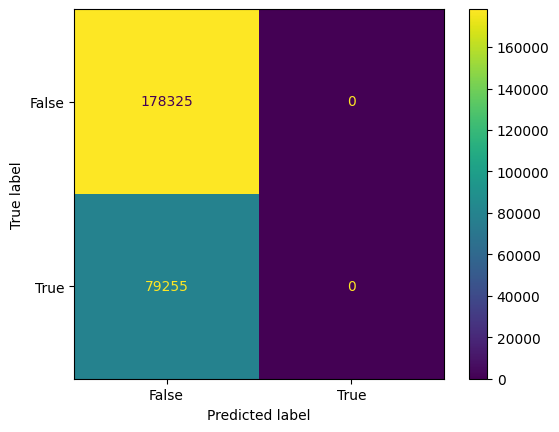

In [ ]:
# Confusion matrix
confusion_matrix = metrics.confusion_matrix(Y_test, np.round(y_pred))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

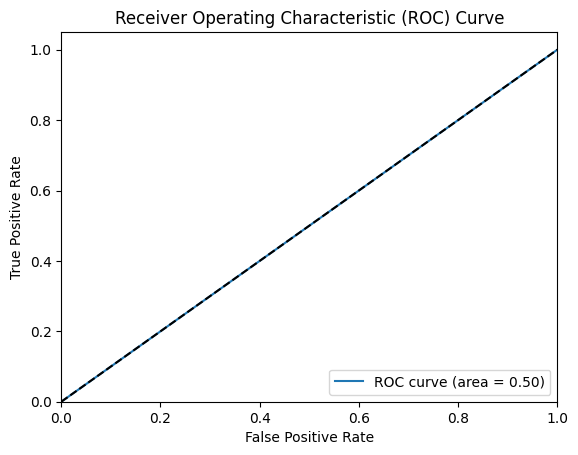

In [ ]:
# Compute ROC curve and AUC
# Plot ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()